In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# setting no limit for the max columns to display, for easier investigation 
pd.options.display.max_columns = None

df = pd.read_csv('Complete_Dataset_updated.csv')
df.head()

,Date,DOY,Sample,Sub-Sample,Lat,Long_,Sample_type,Animals,DM,MM,Biomass,NDF,ADF,CP,TDN_based_ADF,TDN_based_NDF,Satellite_Images_Dates,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,NDWI,EVI,LAI,DVI,GCI,GEMI,SAVI,TEMP_MAX,TEMP_MIN,RAD_SOL,Rainfall,WIND_SPD,EVAPOT,PRES_ATM,HUM_REL,TP_SFC_AVG,Wind_Dir,Dew_Point,Radiative_Dif_AVG,Radiative_Direct_AVG,PPFD,Longwave_Rad_AVG,Environmental Suitability Index
0,7/6/2022,187,1,1,-20.446717,-54.839505,Q1,1,54.177195,6.869019,2943.000000,79.722130,52.504546,4.632363,47.998959,50.537899,44744,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.209516
1,7/6/2022,187,1,2,-20.446717,-54.839505,Q1,1,54.177058,6.835684,2943.000000,70.663844,46.794328,4.811976,52.447219,54.316111,44744,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,5.109516
2,7/6/2022,187,2,1,-20.446996,-54.838856,Q4,1,52.260843,5.125652,2855.333333,79.330072,50.323829,4.644871,49.697737,50.701427,44744,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.506646
3,7/6/2022,187,2,2,-20.446996,-54.838856,Q4,1,52.285797,5.241126,2855.333333,73.021953,49.138437,4.647189,50.621158,53.332543,44744,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,4.606646
4,7/6/2022,187,3,1,-20.446424,-54.839246,G2,1,49.984466,4.742429,3058.666667,74.705529,53.632386,5.006476,47.120371,52.630324,44744,1318,1422,1664,1986,2381,2861,3025,3060,3156,3194,3323,2834,0.212842,-0.025776,0.150619,0.426941,1074,0.838942,-1152285.914,0.319231,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.703806


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

# the dates are in Excel date format, so we need to turn into datetime objects
df['Satellite_Images_Dates'] = pd.to_datetime(df['Satellite_Images_Dates'], origin='1899-12-30', unit='D')

df['Satellite_Images_Dates'] = df['Satellite_Images_Dates'].dt.strftime('%Y-%m-%d')
df[['Date', 'Satellite_Images_Dates']]

,Date,Satellite_Images_Dates
0,2022-07-06,2022-07-02
1,2022-07-06,2022-07-02
2,2022-07-06,2022-07-02
3,2022-07-06,2022-07-02
4,2022-07-06,2022-07-02
...,...,...
307,2023-03-01,2023-02-27
308,2023-03-01,2023-02-27
309,2023-03-01,2023-02-27
310,2023-03-01,2023-02-27


#### Handling Datetimes into day, month, year columns

In [5]:
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# columns for the date of the satellite images
df['sat_day'] = df['Satellite_Images_Dates'].str.split('-').str[2].astype(int)
df['sat_month'] = df['Satellite_Images_Dates'].str.split('-').str[1].astype(int)
df['sat_year'] = df['Satellite_Images_Dates'].str.split('-').str[0].astype(int)

df

,Date,DOY,Sample,Sub-Sample,Lat,Long_,Sample_type,Animals,DM,MM,Biomass,NDF,ADF,CP,TDN_based_ADF,TDN_based_NDF,Satellite_Images_Dates,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,NDWI,EVI,LAI,DVI,GCI,GEMI,SAVI,TEMP_MAX,TEMP_MIN,RAD_SOL,Rainfall,WIND_SPD,EVAPOT,PRES_ATM,HUM_REL,TP_SFC_AVG,Wind_Dir,Dew_Point,Radiative_Dif_AVG,Radiative_Direct_AVG,PPFD,Longwave_Rad_AVG,Environmental Suitability Index,day,month,year,sat_day,sat_month,sat_year
0,2022-07-06,187,1,1,-20.446717,-54.839505,Q1,1,54.177195,6.869019,2943.000000,79.722130,52.504546,4.632363,47.998959,50.537899,2022-07-02,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.209516,6,7,2022,2,7,2022
1,2022-07-06,187,1,2,-20.446717,-54.839505,Q1,1,54.177058,6.835684,2943.000000,70.663844,46.794328,4.811976,52.447219,54.316111,2022-07-02,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,5.109516,6,7,2022,2,7,2022
2,2022-07-06,187,2,1,-20.446996,-54.838856,Q4,1,52.260843,5.125652,2855.333333,79.330072,50.323829,4.644871,49.697737,50.701427,2022-07-02,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.506646,6,7,2022,2,7,2022
3,2022-07-06,187,2,2,-20.446996,-54.838856,Q4,1,52.285797,5.241126,2855.333333,73.021953,49.138437,4.647189,50.621158,53.332543,2022-07-02,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,4.606646,6,7,2022,2,7,2022
4,2022-07-06,187,3,1,-20.446424,-54.839246,G2,1,49.984466,4.742429,3058.666667,74.705529,53.632386,5.006476,47.120371,52.630324,2022-07-02,1318,1422,1664,1986,2381,2861,3025,3060,3156,3194,3323,2834,0.212842,-0.025776,0.150619,0.426941,1074,0.838942,-1152285.914,0.319231,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.703806,6,7,2022,2,7,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2023-03-01,60,154,2,-20.446365,-54.838516,Q4,1,31.915926,10.798575,2261.000000,48.798779,40.637087,7.922138,57.243710,63.436029,2023-02-27,1255,1383,1713,1604,2324,3746,4047,3808,4161,4109,3017,2144,0.407243,0.159376,0.312047,1.010986,2204,1.223001,-4854961.418,0.610808,31.9,22.8,22.54,2.5,12.4,4.89,1015.800000,75.291667,19.443586,124.981135,12.442361,70.217280,296.533237,593.233703,400.042911,5.312839,1,3,2023,27,2,2023
308,2023-03-01,60,155,1,-20.446937,-54.839311,S1,0,45.505167,8.263333,15634.666670,59.758212,44.775544,7.958124,54.019852,58.864850,2023-02-27,1303,1328,1673,1468,2139,3779,4215,3907,4504,4169,2982,2047,0.453767,0.203313,0.349824,1.147663,2439,1.335326,-5945726.831,0.680588,31.9,22.8,22.54,2.5,12.4,4.89,1015.800000,75.291667,19.443586,124.981135,12.442361,70.217280,296.533237,593.233703,400.042911,4.237497,1,3,2023,27,2,2023
309,2023-03-01,60,155,2,-20.446937,-54.839311,S1,0,45.493257,8.218142,15634.666670,60.697330,45.194175,8.190470,53.693738,58.473144,2023-02-27,1303,1328,1673,1468,2139,3779,4215,3907,4504,4169,2982,2047,0.453767,0.203313,0.349824,1.147663,2439,1.335326,-5945726.831,0.680588,31.9,22.8,22.54,2.5,12.4,4.89,1015.800000,75.291667,19.443586,124.9811

#### Performing OneHotEncoding for sample types

In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

one_hot_array = encoder.fit_transform(df[['Sample_type']]).toarray()

one_hot_types_df = pd.DataFrame(one_hot_array, columns=encoder.get_feature_names_out())
# one_hot_types_df

# adding the one-hot encoded columns to the original dataframe (without the original sample type column)
df_encoded = pd.concat([df.drop('Sample_type', axis=1), one_hot_types_df], axis=1)
df_encoded

,Date,DOY,Sample,Sub-Sample,Lat,Long_,Animals,DM,MM,Biomass,NDF,ADF,CP,TDN_based_ADF,TDN_based_NDF,Satellite_Images_Dates,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,NDWI,EVI,LAI,DVI,GCI,GEMI,SAVI,TEMP_MAX,TEMP_MIN,RAD_SOL,Rainfall,WIND_SPD,EVAPOT,PRES_ATM,HUM_REL,TP_SFC_AVG,Wind_Dir,Dew_Point,Radiative_Dif_AVG,Radiative_Direct_AVG,PPFD,Longwave_Rad_AVG,Environmental Suitability Index,day,month,year,sat_day,sat_month,sat_year,Sample_type_G1,Sample_type_G2,Sample_type_G3,Sample_type_G4,Sample_type_Q1,Sample_type_Q2,Sample_type_Q3,Sample_type_Q4,Sample_type_S1,Sample_type_S2
0,2022-07-06,187,1,1,-20.446717,-54.839505,1,54.177195,6.869019,2943.000000,79.722130,52.504546,4.632363,47.998959,50.537899,2022-07-02,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.209516,6,7,2022,2,7,2022,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2022-07-06,187,1,2,-20.446717,-54.839505,1,54.177058,6.835684,2943.000000,70.663844,46.794328,4.811976,52.447219,54.316111,2022-07-02,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,5.109516,6,7,2022,2,7,2022,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2022-07-06,187,2,1,-20.446996,-54.838856,1,52.260843,5.125652,2855.333333,79.330072,50.323829,4.644871,49.697737,50.701427,2022-07-02,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.506646,6,7,2022,2,7,2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2022-07-06,187,2,2,-20.446996,-54.838856,1,52.285797,5.241126,2855.333333,73.021953,49.138437,4.647189,50.621158,53.332543,2022-07-02,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,4.606646,6,7,2022,2,7,2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2022-07-06,187,3,1,-20.446424,-54.839246,1,49.984466,4.742429,3058.666667,74.705529,53.632386,5.006476,47.120371,52.630324,2022-07-02,1318,1422,1664,1986,2381,2861,3025,3060,3156,3194,3323,2834,0.212842,-0.025776,0.150619,0.426941,1074,0.838942,-1152285.914,0.319231,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.703806,6,7,2022,2,7,2022,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2023-03-01,60,154,2,-20.446365,-54.838516,1,31.915926,10.798575,2261.000000,48.798779,40.637087,7.922138,57.243710,63.436029,2023-02-27,1255,1383,1713,1604,2324,3746,4047,3808,4161,4109,3017,2144,0.407243,0.159376,0.312047,1.010986,2204,1.223001,-4854961.418,0.610808,31.9,22.8,22.54,2.5,12.4,4.89,1015.800000,75.291667,19.443586,124.981135,12.442361,70.217280,296.533237,593.233703,400.042911,5.312839,1,3,2023,27,2,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
308,2023-03-01,60,155,1,-20.446937,-54.839311,0,45.505167,8.263333,15634.666670,59.758212,44.775544,7.958124,54.019852,58.864850,2023-02-27,1303,1328,1673,1468,2139,3779,4215,3907,4504,4169,2982,2047,0.453767,0.203313,0.349824,1.147663,2439,1.335326,-5945726.831,0.680588,31.9,22.8,22.54,2.5,12.4,4.89,1015.800000,75.291667,19.443586,124.981135,12.442361,70.217280,296.533237,59

# Predictive Analytics

In [7]:
X = df_encoded.drop(['Biomass', 'Date', 'Satellite_Images_Dates'], axis=1)
y = df_encoded['Biomass']

### Feature Selection

#### 1. First Technique (Lasso)

In [8]:
from sklearn.linear_model import LassoCV

# Perform cross-validation to find the best alpha
lasso_cv = LassoCV(alphas=list(np.logspace(-4, 4, 100)), cv=5, random_state=42)
lasso_cv.fit(X, y)

# Best alpha
best_alpha = lasso_cv.alpha_
lasso_coef = lasso_cv.coef_

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369794.03184604645, tolerance: 245134.94007747027
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9459621.030768394, tolerance: 245134.94007747027
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14416615.209641218, tolerance: 245134.94007747027
  model = cd_fast.enet_coordinate_descent_gr

In [9]:
print(f"Best alpha: {best_alpha}")

Best alpha: 31.257158496882415


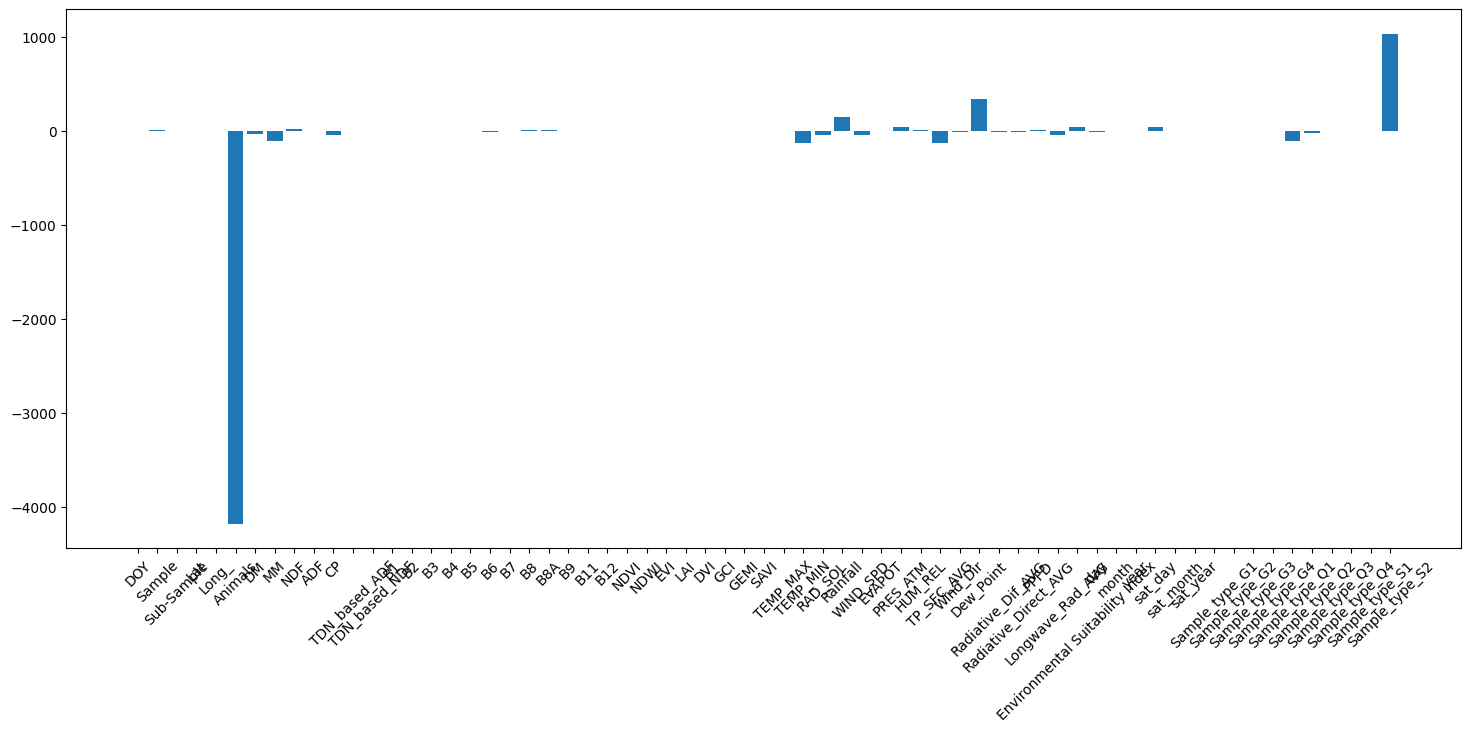

In [10]:
col_names = X.columns
plt.figure(figsize=(18, 7))
plt.bar(col_names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

In [11]:
# making the plot more readable by removing the features with less than 10 coefficients
simplified_features = col_names[lasso_coef > 10] # 10 was chosed because observed coefficients less than 10 are not significant
simplified_lasso_coef = lasso_coef[lasso_coef > 10]
simplified_features

Index(['NDF', 'Rainfall', 'PRES_ATM', 'Dew_Point', 'PPFD',
       'Environmental Suitability Index', 'sat_day', 'Sample_type_S2'],
      dtype='object')

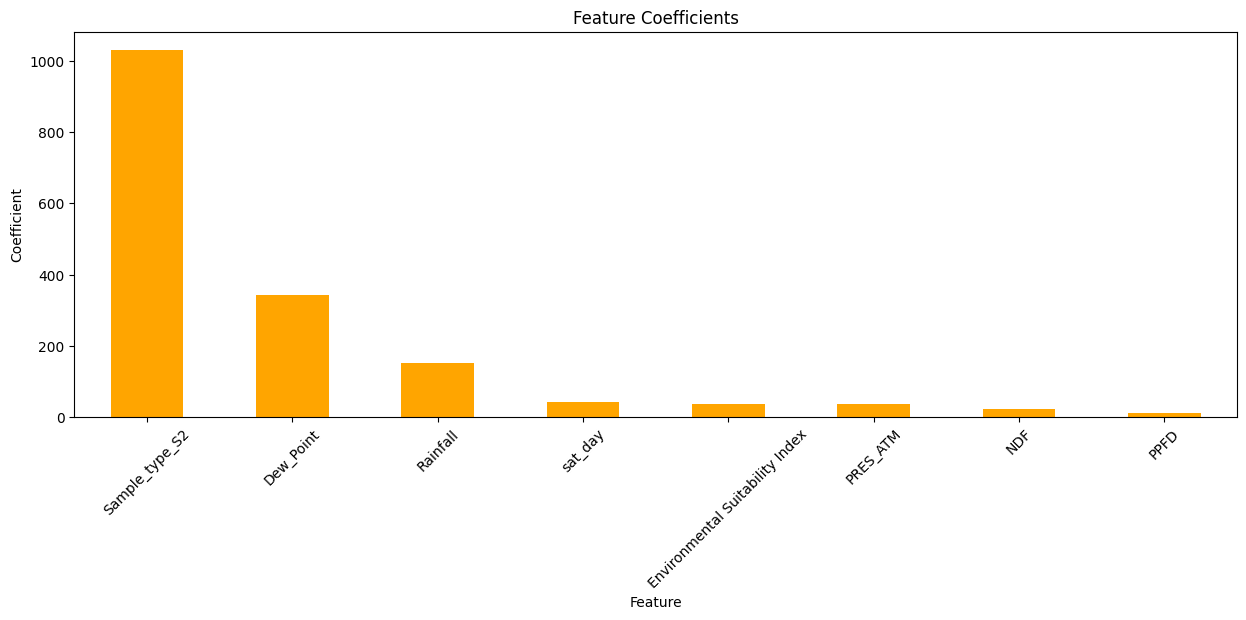

In [12]:
feature_coef_df = pd.DataFrame({'feature': simplified_features, 'coefficient': simplified_lasso_coef})

sorted_feature_coef_df = feature_coef_df.sort_values(by='coefficient', ascending=False)
sorted_feature_coef_df.plot(kind='bar', x='feature', y='coefficient', figsize=(15, 5), color='orange', legend=False)
plt.xticks(rotation=45)
plt.ylabel('Coefficient')
plt.xlabel('Feature')
plt.title('Feature Coefficients')
plt.show()

In [13]:
lasso_selected_features = feature_coef_df['feature'].to_list()
lasso_selected_features_df = df_encoded[lasso_selected_features]
lasso_selected_features_df

,NDF,Rainfall,PRES_ATM,Dew_Point,PPFD,Environmental Suitability Index,sat_day,Sample_type_S2
0,79.722130,0.0,1014.941667,8.584028,358.837504,3.209516,2,0.0
1,70.663844,0.0,1014.941667,8.584028,358.837504,5.109516,2,0.0
2,79.330072,0.0,1014.941667,8.584028,358.837504,3.506646,2,0.0
3,73.021953,0.0,1014.941667,8.584028,358.837504,4.606646,2,0.0
4,74.705529,0.0,1014.941667,8.584028,358.837504,3.703806,2,0.0
...,...,...,...,...,...,...,...,...
307,48.798779,2.5,1015.800000,12.442361,593.233703,5.312839,27,0.0
308,59.758212,2.5,1015.800000,12.442361,593.233703,4.237497,27,0.0
309,60.697330,2.5,1015.800000,12.442361,593.233703,5.537497,27,0.0
310,76.160698,2.5,1015.800000,12.442361,593.233703,4.834511,27,1.0


In [14]:
lasso_selected_features_df['Sample_type_S2'].var()

0.11686866188473909

**quick note**: altough Sample_type_S2 has a very low varience, i decided to keep it to study the performance of the model when trained on this select dataset

#### 2. Second Technique (SelectFromModel)

In [15]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

sfm = SelectFromModel(model)
sfm.fit(X_train, y_train)

selected_features = X.columns[sfm.get_support()]
SFM_df = df[selected_features]
SFM_df


,NDF,ADF,TDN_based_ADF,TDN_based_NDF,NDVI,EVI,LAI,SAVI
0,79.722130,52.504546,47.998959,50.537899,0.223616,0.160974,0.464404,0.335391
1,70.663844,46.794328,52.447219,54.316111,0.223616,0.160974,0.464404,0.335391
2,79.330072,50.323829,49.697737,50.701427,0.218199,0.156601,0.448582,0.327267
3,73.021953,49.138437,50.621158,53.332543,0.218199,0.156601,0.448582,0.327267
4,74.705529,53.632386,47.120371,52.630324,0.212842,0.150619,0.426941,0.319231
...,...,...,...,...,...,...,...,...
307,48.798779,40.637087,57.243710,63.436029,0.407243,0.312047,1.010986,0.610808
308,59.758212,44.775544,54.019852,58.864850,0.453767,0.349824,1.147663,0.680588
309,60.697330,45.194175,53.693738,58.473144,0.453767,0.349824,1.147663,0.680588
310,76.160698,46.191561,52.916774,52.023373,0.448134,0.343437,1.124554,0.672137


#### It is clear that the two feature selection techniques resulted in different selected features, this is interesting because we can test them and see which gives the best results.

### Models Comparison

### Machine Learning Regression Model (LinearRegression)

##### Training LinearRegression model on the selected features from Lasso

In [16]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def select_best_model_kfold(data, model=LinearRegression(), n_splits=5):
    """
    Function to perform k-fold cross-validation on the given data and return the best model
    data: DataFrame, the data to be used for training and testing
    model: the model to be used for training and testing, default is LinearRegression
    return: dict, the best model 
    """

    # implementing k-fold training and testing
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    attempts = {}

    for train_index, test_index in kf.split(data):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        model.fit(X_train, y_train)
    
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        attempts[f'Attempt {len(attempts) + 1}'] = {
        'model': model,
        'mae': mae,
        'r2': r2}
            
    return attempts

line_lasso_attempts = select_best_model_kfold(lasso_selected_features_df, n_splits=6)
mae_vals = []
for attempt, values in line_lasso_attempts.items():
    print(f"{attempt}: MAE: {values['mae']}, R2: {values['r2']}")
    mae_vals.append(values['mae'])

print(f'Mean MAE: {np.mean(mae_vals)}')
print(f'Best model: {max(line_lasso_attempts, key=lambda x: line_lasso_attempts[x]['r2'])}, R2: {line_lasso_attempts[max(line_lasso_attempts, key=lambda x: line_lasso_attempts[x]['r2'])]["r2"]}')

Attempt 1: MAE: 2184.0561864990304, R2: 0.2411776177598267
Attempt 2: MAE: 1855.8289160469542, R2: 0.40328382124204987
Attempt 3: MAE: 1405.5300719952547, R2: 0.43751161112734194
Attempt 4: MAE: 2038.7811436994905, R2: 0.2477629088464911
Attempt 5: MAE: 2000.2215370937643, R2: 0.4326128883420993
Attempt 6: MAE: 1703.9396977357524, R2: 0.4723329600642744
Mean MAE: 1864.726258845041
Best model: Attempt 6, R2: 0.4723329600642744


##### Training LinearRegression model on the selected features from SelectFromModel

In [17]:
line_SFM_attempts = select_best_model_kfold(SFM_df, n_splits=6)

mae_vals = []
for attempt, values in line_SFM_attempts.items():
    print(f"{attempt}: MAE: {values['mae']}, R2: {values['r2']}")
    mae_vals.append(values['mae'])

print(f'Mean MAE: {np.mean(mae_vals)}')
print(f'Best model: {max(line_SFM_attempts, key=lambda x: line_SFM_attempts[x]['r2'])}, R2: {line_SFM_attempts[max(line_SFM_attempts, key=lambda x: line_SFM_attempts[x]['r2'])]["r2"]}')

Attempt 1: MAE: 1800.4825508627403, R2: 0.45906619904506674
Attempt 2: MAE: 1906.6952061502404, R2: 0.26639155042784124
Attempt 3: MAE: 1317.8189603557694, R2: 0.5296168546181087
Attempt 4: MAE: 1666.2869773315203, R2: 0.4615000581760603
Attempt 5: MAE: 1853.7386757213944, R2: 0.47426378254211055
Attempt 6: MAE: 1651.5621852995791, R2: 0.4319926995716651
Mean MAE: 1699.4307592868743
Best model: Attempt 3, R2: 0.5296168546181087


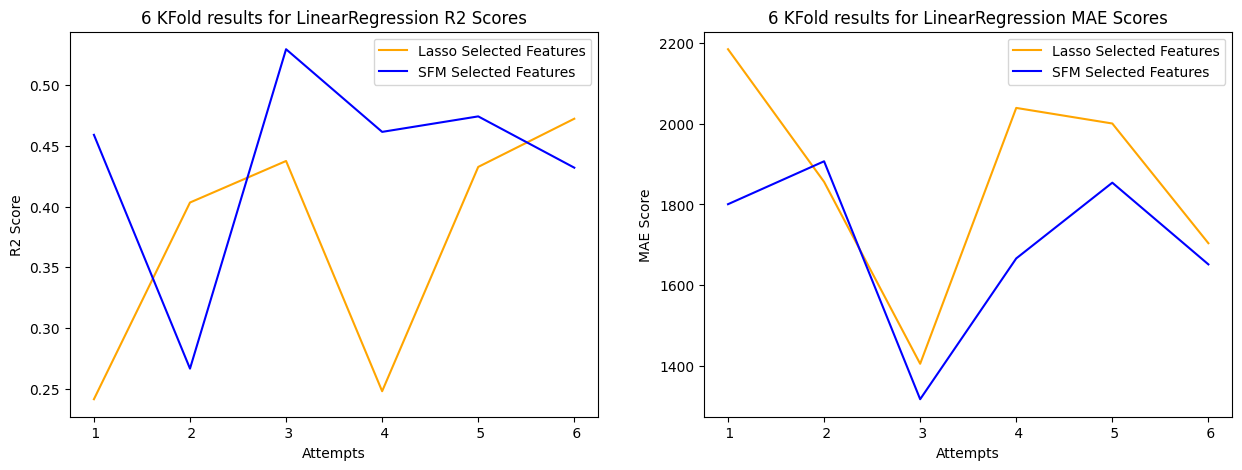

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot([attempt[7:] for attempt in line_lasso_attempts.keys()], [line_lasso_attempts[attempt]['r2'] for attempt in line_lasso_attempts], color='orange', label='Lasso Selected Features')
ax[0].plot([attempt[7:] for attempt in line_SFM_attempts.keys()], [line_SFM_attempts[attempt]['r2'] for attempt in line_SFM_attempts], color='blue', label='SFM Selected Features')
ax[0].set_title('6 KFold results for LinearRegression R2 Scores')
ax[0].set_xlabel('Attempts')
ax[0].set_ylabel('R2 Score')
ax[0].legend()

ax[1].plot([attempt[7:] for attempt in line_lasso_attempts.keys()], [line_lasso_attempts[attempt]['mae'] for attempt in line_lasso_attempts], color='orange', label='Lasso Selected Features')
ax[1].plot([attempt[7:] for attempt in line_SFM_attempts.keys()], [line_SFM_attempts[attempt]['mae'] for attempt in line_SFM_attempts], color='blue', label='SFM Selected Features')
ax[1].set_title('6 KFold results for LinearRegression MAE Scores')
ax[1].set_xlabel('Attempts')
ax[1].set_ylabel('MAE Score')
ax[1].legend()

plt.show()

##### Using **SelectFromModel** for feature selection provided better data for LinearRegression model, rather than Lasso.

### Time Series Model (Exponential Smoothing)

In [19]:
biomass = df['Biomass']

In [20]:
sample_size = int(0.8 * len(biomass))

train_set = biomass.iloc[0:sample_size]
test_set = biomass.iloc[sample_size:]
test_set_indecies = test_set.index

In [21]:
def expForcast(Ap, Fp, a):
    return Fp + a*(Ap-Fp)

alpha_vals = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9]
forecasts = {}  # dict to store forecasts for each alpha

for a in alpha_vals:
    # Train on the training set
    Fp = train_set[0]
    train_forecast = []
    
    # Train on the training set
    for val in train_set:
        new_forecast = expForcast(val, Fp, a)
        train_forecast.append(new_forecast)
        Fp = new_forecast 
    
    # Test on the test set
    test_forecast = []
    for val in test_set:
        new_forecast = expForcast(val, Fp, a)
        test_forecast.append(new_forecast)
        Fp = new_forecast
    
    # Store results
    forecasts[a] = {
        "train_forecast": train_forecast,
        "test_forecast": test_forecast,
        "train_set": train_set.tolist(),
        "test_set": test_set.tolist()
    }

for alpha, values in forecasts.items():
    print(f"Alpha: {alpha}, Train MAE: {mean_absolute_error(values['train_set'], values['train_forecast'])}, Test MAE: {mean_absolute_error(values['test_set'], values['test_forecast'])}")

Alpha: 0.1, Train MAE: 1942.5849540213103, Test MAE: 2533.492175666742
Alpha: 0.2, Train MAE: 1678.1249254415916, Test MAE: 2164.442711452453
Alpha: 0.4, Train MAE: 1095.18786726878, Test MAE: 1418.133441458875
Alpha: 0.6, Train MAE: 625.1941835113904, Test MAE: 825.3332017078627
Alpha: 0.8, Train MAE: 268.43486598658285, Test MAE: 355.01573510656584
Alpha: 0.9, Train MAE: 123.92879820163162, Test MAE: 163.08927647093057


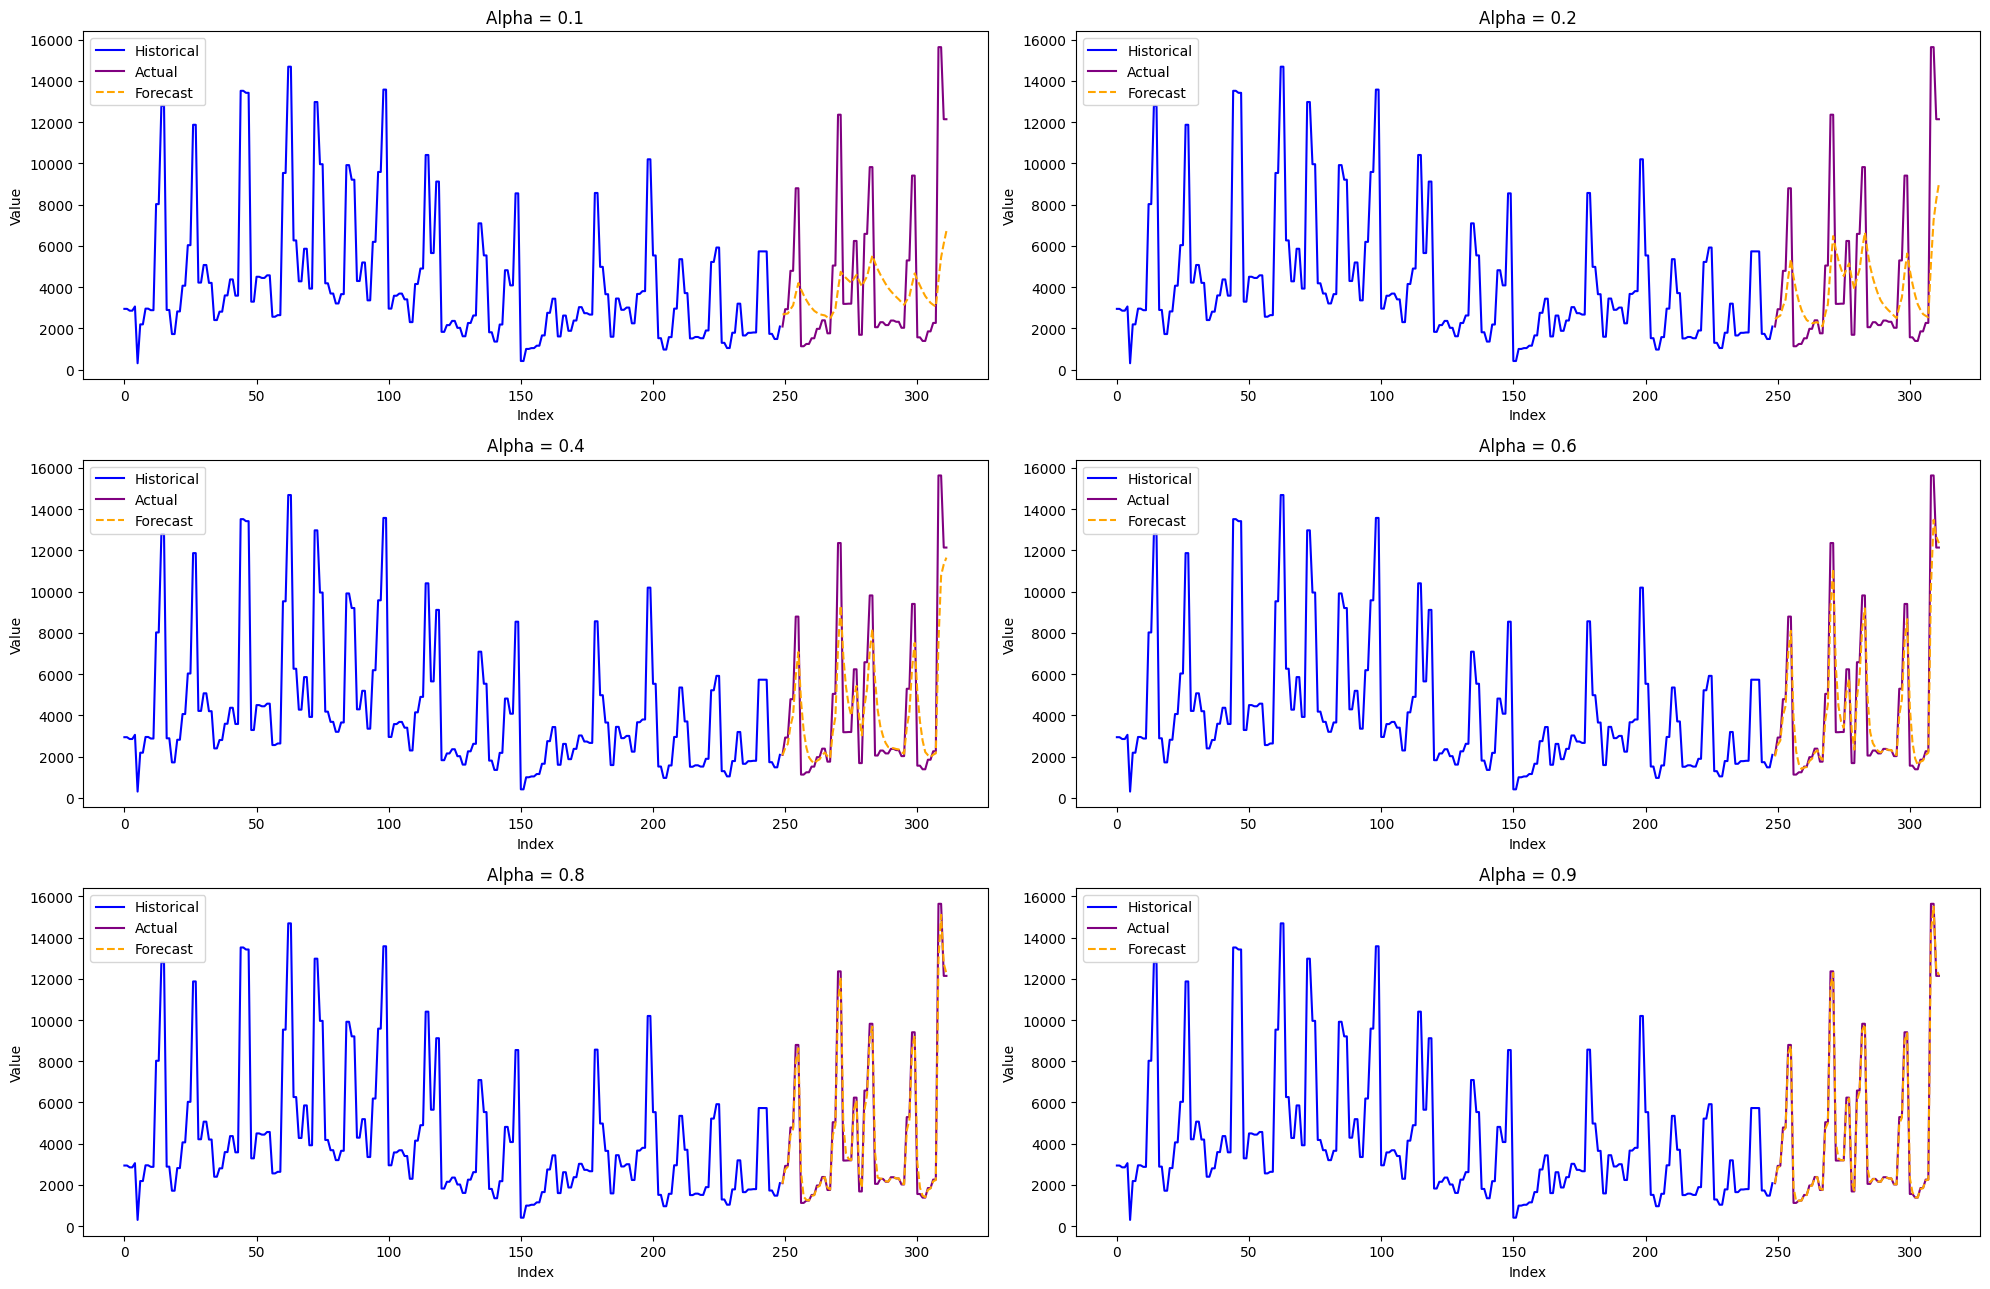

In [22]:
fig, ax = plt.subplots(3, 2, figsize=(20, 13))

for i, a in enumerate(alpha_vals):
    row, col = i // 2, i % 2
    ax[row, col].plot(train_set.index, train_set.values, label='Historical', color='blue')
    ax[row, col].plot(test_set.index, test_set, label='Actual', color='purple')
    ax[row, col].plot(test_set_indecies, forecasts[a]["test_forecast"], label='Forecast', color='orange', linestyle='--')
    ax[row, col].set_title(f'Alpha = {a}')
    ax[row, col].set_xlabel('Index')
    ax[row, col].set_ylabel('Value')
    ax[row, col].legend()

plt.tight_layout()
plt.show()

### Deep Learning (LSTM)

In [23]:
!pip install tensorflow

In [24]:
import tensorflow  as tf
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from tensorflow.keras.layers import LSTM, Dense

In [25]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.51940299, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.51940299, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.51940299, 0.00645161, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.14029851, 0.99354839, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.14029851, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.14029851, 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [58]:
time_steps = 1
n_features = X_scaled.shape[1]

# Reshape the input data to be 3D [samples, time steps, features]
X_train_reshaped = X_train.reshape((X_train.shape[0], time_steps, n_features))
X_test_reshaped = X_test.reshape((X_test.shape[0], time_steps, n_features))

# Build the LSTM model
model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(48, activation='relu'),
    Dense(32, activation='relu'),
    Dense(28, activation='relu'),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
history = model_lstm.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 29591854.0000 - mae: 4341.5674 - val_loss: 30301136.0000 - val_mae: 4545.2158
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 28743164.0000 - mae: 4255.7314 - val_loss: 30298786.0000 - val_mae: 4544.9580
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 26925004.0000 - mae: 4110.8022 - val_loss: 30293432.0000 - val_mae: 4544.3657
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 31064428.0000 - mae: 4455.6670 - val_loss: 30281850.0000 - val_mae: 4543.0762
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 30160342.0000 - mae: 4398.8086 - val_loss: 30257920.0000 - val_mae: 4540.4067
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 25420374.0000 - mae: 3997.8799 - val_loss: 30209490.0000 - val_mae: 4534.9902
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 31274496.0000 - mae: 4374.2935 - val_loss: 30115348.0000 - val_mae: 4524.4370
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/ste

In [61]:
# Evaluate the model
loss, mae = model_lstm.evaluate(X_test_reshaped, y_test)
print(f"Mean Absolute Error on Test Data: {mae}")

predictions = model_lstm.predict(X_test_reshaped)

# Calculate R-squared score
r2 = r2_score(y_test, predictions)
print(f"R-squared Score on Test Data: {r2}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 2188457.7500 - mae: 1069.3401
Mean Absolute Error on Test Data: 1051.8714599609375
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
R-squared Score on Test Data: 0.802405442137603


The LSTM model's performance is bad

In [62]:
# Create a comparison DataFrame
predictions_flat = predictions.flatten()
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions_flat
})
comparison_df

,Actual,Predicted
0,6262.666667,4813.259766
1,5917.333333,7757.420898
2,2897.666667,2928.524414
3,5532.000000,6638.860352
4,2300.000000,4144.645996
...,...,...
58,3653.666667,1982.822021
59,2023.000000,2039.017090
60,305.866667,2564.806396
61,4203.333333,4287.820312
